In [1]:
from sklearn import datasets
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
print(data_breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

<AxesSubplot:xlabel='x', ylabel='y'>

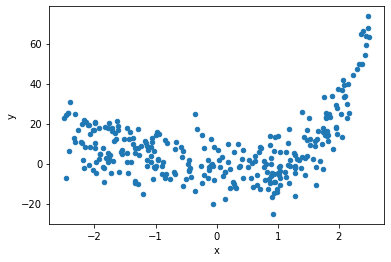

In [3]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4 
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [4]:
X_cancer = data_breast_cancer.data[["mean texture", "mean symmetry"]]
X_cancer.head()

,mean texture,mean symmetry
0,10.38,0.2419
1,17.77,0.1812
2,21.25,0.2069
3,20.38,0.2597
4,14.34,0.1809


In [5]:
y_cancer = data_breast_cancer.target
y_cancer.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [6]:
from sklearn.model_selection import train_test_split
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X_cancer, y_cancer, test_size=0.2)

In [7]:
print(len(X_cancer_train), len(X_cancer_test))

455 114


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
best_train_score = -1
best_test_score = -1
best_x_train = -1
for x in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=x)
    #Fitting to cancer_train
    tree_clf.fit(X_cancer_train, y_cancer_train)
    y_pred_train = tree_clf.predict(X_cancer_train)
    train_score = f1_score(y_cancer_train, y_pred_train)
    print(str(x) + "Train score = " + str(train_score))
    y_pred_test = tree_clf.predict(X_cancer_test)
    test_score = f1_score(y_cancer_test, y_pred_test)
    print(str(x) + "Test score = " + str(test_score))
    print("\n")

1Train score = 0.7514018691588785
1Test score = 0.8633093525179856


2Train score = 0.8210180623973727
2Test score = 0.855263157894737


3Train score = 0.8210180623973727
3Test score = 0.855263157894737


4Train score = 0.8245315161839863
4Test score = 0.855263157894737


5Train score = 0.8581081081081081
5Test score = 0.8235294117647058


6Train score = 0.87893864013267
6Test score = 0.8250000000000001


7Train score = 0.9072512647554805
7Test score = 0.8076923076923077


8Train score = 0.9360269360269361
8Test score = 0.8205128205128205


9Train score = 0.9602763385146805
9Test score = 0.8025477707006369


10Train score = 0.9759450171821307
10Test score = 0.7948717948717948


11Train score = 0.9861591695501729
11Test score = 0.7999999999999998


12Train score = 0.9930795847750865
12Test score = 0.7948717948717948


13Train score = 0.9930795847750865
13Test score = 0.7999999999999998


14Train score = 0.9965277777777778
14Test score = 0.8051948051948051


15Train score = 0.99652777777

In [9]:
tree_clf = DecisionTreeClassifier(max_depth=3)

In [10]:
clf = tree_clf.fit(X_cancer_train, y_cancer_train)

In [11]:
from sklearn.metrics import accuracy_score
tree_depth = 3
y_pred_train = tree_clf.predict(X_cancer_train)
f1_train = f1_score(y_cancer_train, y_pred_train)
y_pred_test = tree_clf.predict(X_cancer_test)
f1_test = f1_score(y_cancer_test, y_pred_test)
acc_train = accuracy_score(y_cancer_train, y_pred_train)
acc_test = accuracy_score(y_cancer_test, y_pred_test)

values_list = [tree_depth, f1_train, f1_test, acc_train, acc_test]
print(values_list)

[3, 0.8210180623973727, 0.855263157894737, 0.7604395604395604, 0.8070175438596491]


In [12]:
import pickle
open_file = open("f1acc_tree.pkl", "wb")
pickle.dump(values_list, open_file)
open_file.close()

In [13]:
open_file = open("f1acc_tree.pkl", "rb")
loaded_list = pickle.load(open_file)
open_file.close()
print(loaded_list)

[3, 0.8210180623973727, 0.855263157894737, 0.7604395604395604, 0.8070175438596491]


In [14]:
from sklearn.tree import export_graphviz
import graphviz

In [15]:
from sklearn.tree import DecisionTreeRegressor
X_df = df.x.to_numpy().reshape(-1,1)
y_df = df.y

In [16]:
y_df.head()

0    24.140396
1     1.730884
2    10.192924
3     0.534167
4     8.147666
Name: y, dtype: float64

In [17]:
X_df_train, X_df_test, y_df_train, y_df_test = train_test_split(X_df, y_df, test_size=0.2)

In [18]:
print(len(X_df_train), len(X_df_test))

240 60


In [19]:
from sklearn.metrics import mean_squared_error as mse
best_test_mse = np.inf
best_x = -1
for x in range(1,20):
    tree_reg = DecisionTreeRegressor(max_depth=x)
    #Fitting to cancer_train
    tree_reg.fit(X_df_train, y_df_train)
    y_pred_train = tree_reg.predict(X_df_train)
    train_mse = mse(y_df_train, y_pred_train)
    print(str(x) + "Train mse = " + str(train_mse))
    y_pred_test = tree_reg.predict(X_df_test)
    test_mse = mse(y_df_test, y_pred_test)
    print(str(x) + "Test mse = " + str(test_mse))
    print("\n")
    if test_mse<best_test_mse:
        best_test_mse = test_mse
        best_x = x
print(best_x)

1Train mse = 132.83318890186106
1Test mse = 117.69457923547961


2Train mse = 96.94987403751962
2Test mse = 93.96318313974139


3Train mse = 76.69722918090365
3Test mse = 86.1164638275828


4Train mse = 68.47361365157538
4Test mse = 78.82786462157317


5Train mse = 59.30498496392589
5Test mse = 83.34248260323865


6Train mse = 53.9062611888189
6Test mse = 82.13745670711879


7Train mse = 44.361679399703206
7Test mse = 98.00326584386185


8Train mse = 34.95248306758739
8Test mse = 103.5428873320456


9Train mse = 30.088517307825548
9Test mse = 111.5672672507846


10Train mse = 23.321769443443046
10Test mse = 117.49798711449748


11Train mse = 18.5107608567193
11Test mse = 124.16412650124455


12Train mse = 12.31336663103922
12Test mse = 128.98314156835983


13Train mse = 7.804891875890988
13Test mse = 130.68955809247512


14Train mse = 4.308117033770662
14Test mse = 127.24710135102565


15Train mse = 1.534163407368984
15Test mse = 131.85859496515357


16Train mse = 0.27685689761880045
1

In [20]:
tree_reg = DecisionTreeRegressor(max_depth=best_x)
tree_reg.fit(X_df_train, y_df_train)
y_pred_train = tree_reg.predict(X_df_train)
y_pred_test = tree_reg.predict(X_df_test)
mse_train = mse(y_df_train, y_pred_train)
mse_test = mse(y_df_test, y_pred_test)

df_values_list = [best_x, mse_train, mse_test]
print(df_values_list)

[4, 68.47361365157538, 78.82786462157317]


In [21]:
open_file = open("mse_tree.pkl", "wb")
pickle.dump(df_values_list, open_file)
open_file.close()

In [22]:
open_file = open("mse_tree.pkl", "rb")
loaded_list = pickle.load(open_file)
open_file.close()
print(loaded_list)

[4, 68.47361365157538, 78.82786462157317]


In [23]:
import pydot

export_graphviz(
    tree_reg,
    out_file="reg.dot",
    feature_names=None,
    rounded=True,
    filled=True
)

In [24]:
(graph,) = pydot.graph_from_dot_file('reg.dot')
graph.write_png('reg.png')

In [25]:
export_graphviz(
    tree_clf,
    out_file="bc.dot",
    feature_names=["mean texture", "mean symmetry"],
    rounded=True,
    filled=True
)

In [26]:
(graph,) = pydot.graph_from_dot_file('bc.dot')
graph.write_png('bc.png')